In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('ex1data1.csv',names=['data'])  
data.head()  

,data
0,"6.1101,17.592"
1,"5.5277,9.1302"
2,"8.5186,13.662"
3,"7.0032,11.854"
4,"5.8598,6.8233"


In [3]:
data['Population'] = data['data'].apply(lambda title: title.split(',')[0])

In [4]:
data['Profit'] = data['data'].apply(lambda title: title.split(',')[1])

In [5]:
data.head()

,data,Population,Profit
0,"6.1101,17.592",6.1101,17.592
1,"5.5277,9.1302",5.5277,9.1302
2,"8.5186,13.662",8.5186,13.662
3,"7.0032,11.854",7.0032,11.854
4,"5.8598,6.8233",5.8598,6.8233


In [6]:
data.drop('data',axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null object
Profit        97 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [8]:
data.describe()

,Population,Profit
count,97,97
unique,97,97
top,5.7107,0.29678
freq,1,1


In [9]:
data['Profit']=data['Profit'].astype(float)
data['Population']=data['Population'].astype(float)

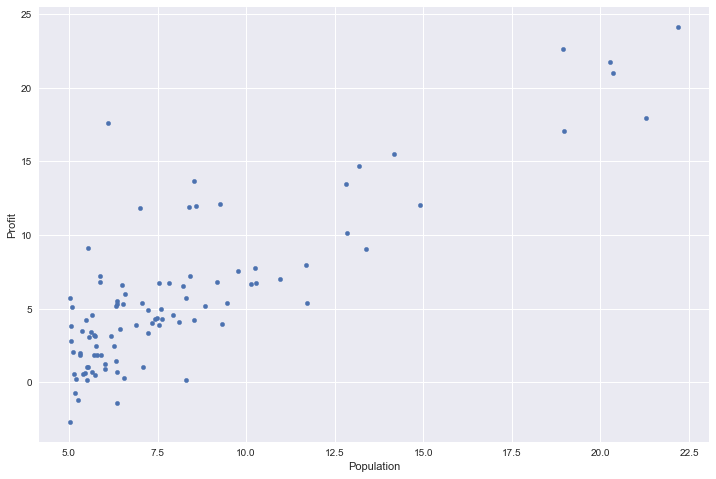

In [10]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))  

In [11]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [12]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)


In [13]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [14]:
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]  

In [15]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  


In [16]:
X=X.astype(float)
y=y.astype(float)

In [17]:
theta = np.matrix(np.zeros(shape=(2,1)))

In [18]:
X.shape

(97, 2)

In [19]:
theta.shape

(2, 1)

In [20]:
computeCost(X, y, theta.T)  

32.072733877455676

In [21]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [22]:
theta


matrix([[ 0.],
        [ 0.]])

In [23]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
theta, cost = gradientDescent(X, y, theta.T, alpha, iters)  
theta

matrix([[-3.24140214,  1.1272942 ]])

In [24]:
computeCost(X, y, theta)  

4.5159555030789136

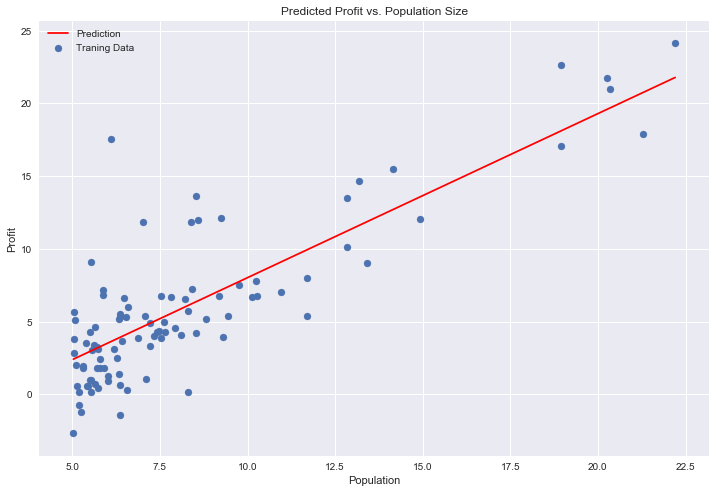

In [25]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size') 

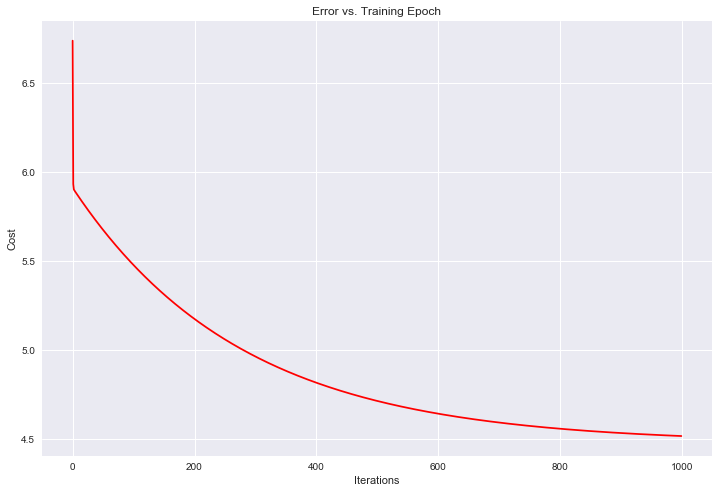

In [26]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [27]:
#normal method
inverse=np.linalg.inv(X.T*X)

In [28]:
inverse.shape
X.shape

(97, 2)

In [29]:
f=inverse*X.T*y

In [30]:
f
#normal method end

matrix([[-3.89578088],
        [ 1.19303364]])

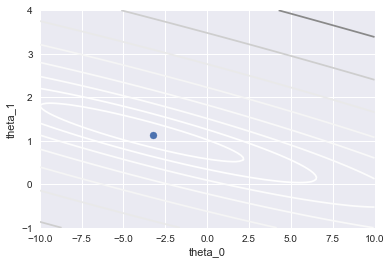

In [31]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = computeCost(X, y, thetaT.T)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.scatter(theta.T[0,0], theta.T[1,0])


In [32]:
theta.T[0][0]

matrix([[-3.24140214]])